In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import pandas as pd


from sklearn.cluster import DBSCAN

py.sign_in('azai91', 'LreJY5jHtBf0lSX5wUez')

In [2]:
json_data = open('./../trace/data/sample_locations.json').read()
data = json.loads(json_data)
X = np.array([(c.get('lat'), c.get('lng')) for c in data])

In [3]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

/Users/Zai/anaconda3/lib/python3.6/site-packages/matplotlib/lines.py:1206: FutureWarning:

comparison to `None` will result in an elementwise object comparison in the future.



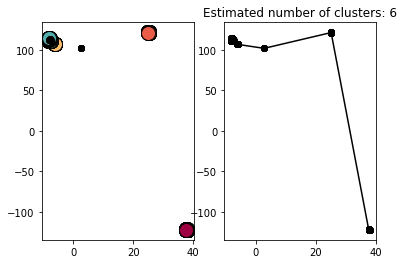

In [4]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.subplot(1,2,1)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.subplot(1,2,2)
plt.plot(X[:,0], X[:,1], 'ko-')
    
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [5]:
df = pd.DataFrame(columns=['lat','lng'], data=X)

In [9]:
data = [dict(lat = df['lat'],lon = df['lng'],text =  str(df['lat']) + ',' +str(df['lng']),type = 'scattergeo',mode = 'lines')]
layout = dict(
        title = 'Asia Trip',
        showlegend = False, 
        geo = dict(
#             scope='north america',
#             projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )
fig = { 'data':data }
py.iplot(fig, validate=False, filename='test')

/Users/Zai/anaconda3/lib/python3.6/site-packages/plotly/tools.py:1392: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

